In [4]:
#Code checked: 09/18/2024, Dumi

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import dataset and assign x and y
data = pd.read_csv('new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv')
X, y = data[['mass', 'z','fov','mlt', 'age', 'teff', 'lum']], data['log_k']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Import TensorFlow and necessary layers for building the GAN model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Function to build the Generator model
def build_generator(input_dim):
    model = tf.keras.Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  # Hidden layer with ReLU activation
    model.add(Dense(X_train_scaled.shape[1]))  # Output layer, output dimension same as input features
    return model

# Function to build the Discriminator model
def build_discriminator(input_dim):
    model = tf.keras.Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  # Hidden layer with ReLU activation
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

# Function to build the GAN by combining the Generator and Discriminator
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator weights during GAN training
    model = tf.keras.Sequential()
    model.add(generator)  # Add Generator to the GAN model
    model.add(discriminator)  # Add Discriminator to the GAN model
    return model

# Function to compile and train the GAN
def compile_and_train_gan(generator, discriminator, gan, X_train, epochs=2000, batch_size=64):
    # Compile Discriminator with binary cross-entropy loss and Adam optimizer
    discriminator.compile(loss='binary_crossentropy', optimizer='adam')
    # Compile GAN model with binary cross-entropy loss and Adam optimizer
    gan.compile(loss='binary_crossentropy', optimizer='adam')

    # Training loop for the GAN
    for epoch in range(epochs):
        # Train Discriminator
        indices = np.random.randint(0, X_train.shape[0], batch_size)  # Randomly select real data samples
        real_features = X_train[indices]  # Select real data samples
        fake_features = generator.predict(np.random.randn(batch_size, generator.input_shape[1]))  # Generate fake samples

        real_labels = np.ones((batch_size, 1))  # Labels for real samples (1s)
        fake_labels = np.zeros((batch_size, 1))  # Labels for fake samples (0s)

        d_loss_real = discriminator.train_on_batch(real_features, real_labels)  # Train on real data
        d_loss_fake = discriminator.train_on_batch(fake_features, fake_labels)  # Train on fake data

        # Train Generator via GAN to fool Discriminator
        noise = np.random.randn(batch_size, generator.input_shape[1])  # Random noise input for Generator
        g_loss = gan.train_on_batch(noise, real_labels)  # Generator tries to produce 'real' data

        # Print training progress every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch} | D Loss Real: {d_loss_real} | D Loss Fake: {d_loss_fake} | G Loss: {g_loss}')


In [6]:
# Initialize and build the GAN
input_dim = 100  # Dimensionality of the random noise
generator = build_generator(input_dim)
discriminator = build_discriminator(X_train_scaled.shape[1])
gan = build_gan(generator, discriminator)

# Train the GAN
compile_and_train_gan(generator, discriminator, gan, X_train_scaled)

# Generate synthetic data
num_samples = 1000
noise = np.random.randn(num_samples, input_dim)
generated_features = generator.predict(noise)

# Combine generated features with real data for further analysis
X_combined = np.vstack([X_train_scaled, generated_features])

/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 | D Loss Real: 0.82705157995224 | D Loss Fake: 0.7518317699432373 | G Loss: [array(0.75183177, dtype=float32), array(0.75183177, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time

# Combine real and synthetic data
X_combined = np.vstack([X_train_scaled, generated_features])
y_combined = np.concatenate([y_train, y_train[:num_samples]])  # Assuming same size for simplicity

# Split combined data
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Train a regression model on the augmented dataset and evaluate its performance using MSE.
model = LinearRegression()
model.fit(X_train_combined, y_train_combined)

# Predict and evaluate metrics and test time
start_time = time.time()
y_pred = model.predict(X_test_combined)
end_time = time.time()
test_time = end_time - start_time
print(f"Testing time: {test_time:.3f} seconds")

mse = mean_squared_error(y_test_combined, y_pred)
mae = mean_absolute_error(y_test_combined, y_pred)

print(f'Mean Squared Error: {mse}')

Testing time: 0.001 seconds
Mean Squared Error: 0.009121459669441199


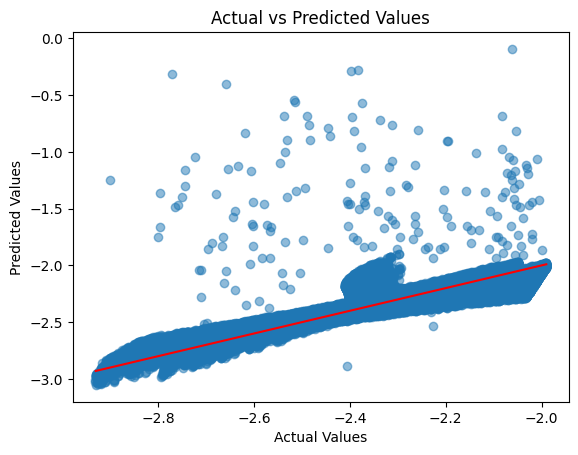

In [17]:
import matplotlib.pyplot as plt

#Plot actual vs predicted values
plt.scatter(y_test_combined, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

## Feature Importance

mass: 0.0600
z: 0.0010
fov: 0.0000
mlt: 0.0003
age: 0.0000
teff: 0.0011
lum: 0.1498


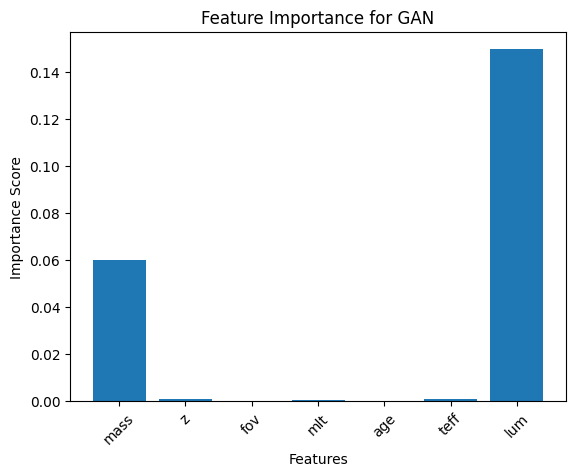

In [20]:
# Import necessary libraries for computing mean squared error and plotting
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to calculate permutation feature importance
def permutation_feature_importance(model, X_test, y_test, n_repeats=10):
    # Get baseline performance using mean squared error
    baseline_predictions = model.predict(X_test)
    baseline_performance = mean_squared_error(y_test, baseline_predictions)
    
    # Initialize array to store importance scores for each feature
    importances = np.zeros(X_test.shape[1])
    
    # Iterate over each feature in the test set
    for i in range(X_test.shape[1]):
        scores = []  # List to store performance scores for each repetition
        X_test_permuted = X_test.copy()  # Create a copy to permute without affecting the original data
        
        # Perform n_repeats for robust importance scoring
        for _ in range(n_repeats):
            # Permute feature i by shuffling values in the column
            np.random.shuffle(X_test_permuted[:, i])
            # Get predictions for the permuted test data
            permuted_predictions = model.predict(X_test_permuted)
            # Compute performance (MSE) for permuted data
            permuted_performance = mean_squared_error(y_test, permuted_predictions)
            # Calculate the difference in performance
            scores.append(permuted_performance - baseline_performance)
        
        # Average the scores over repetitions to get the importance of feature i
        importances[i] = np.mean(scores)
    
    return importances

# Compute the feature importances using the defined function
feature_importances = permutation_feature_importance(model, X_test_combined, y_test_combined)

# Define feature names for labeling
features = ['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']

# Print feature importance scores for each feature
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Plot feature importances as a bar chart
plt.bar(features, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for GAN')
plt.xticks(rotation=45)
plt.show()



## SHAP

In [10]:
# Install SHAP library
!pip install shap
import shap

In [11]:
# Create a SHAP explainer for the trained model
explainer = shap.Explainer(model, X_train_combined)

# Compute SHAP values for the test set
shap_values = explainer(X_test_combined)

/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


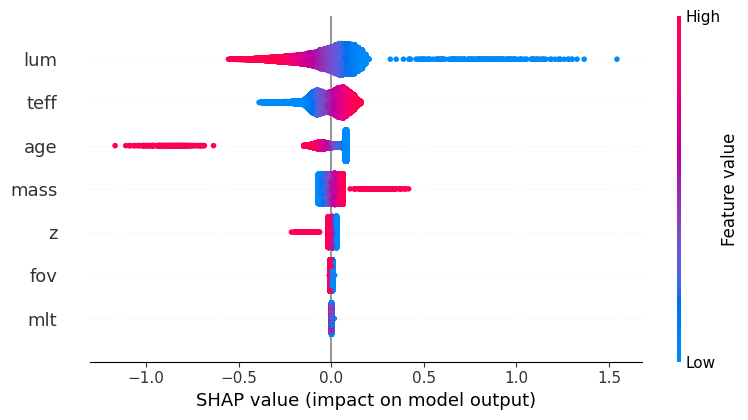

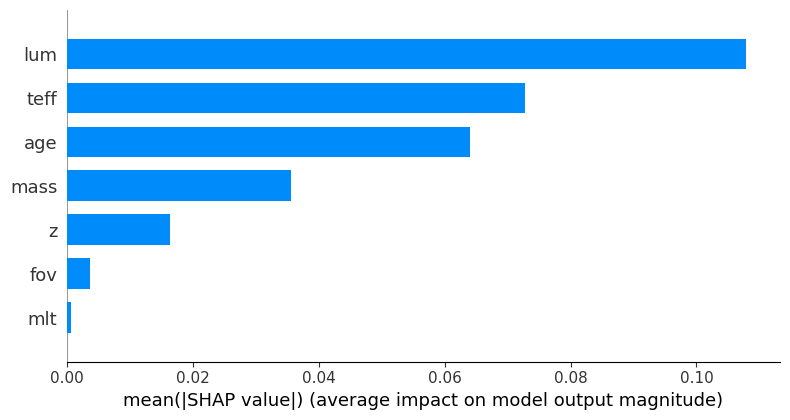

In [12]:
# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_combined, feature_names=X.columns)
shap.summary_plot(shap_values, X_test_combined, feature_names=X.columns, plot_type="bar")